In [1]:
import pandas as pd
import time
import pickle
import datetime
from sqlalchemy import create_engine

from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [43]:
pk1_file = open('cluster_monthly_observation_data_2018-07-31_2019-08-31.pk1','rb')
observation_data = pickle.load(pk1_file)

In [55]:
observation_data[4]['data']['butterfly'].loc[2]['monthly_count']

155

In [56]:
observation_data[4]['data']['dragonfly'].loc[2]['monthly_count']

5

In [15]:
pk2_file = open('formatted_climate_data_2018-03_2019-08.pk1','rb')
climate_data = pickle.load(pk2_file)

In [57]:
def get_dragon_butter_ratio_i_j(data,i,j):
    butterfly_num = data[i]['data']['butterfly'].loc[j]['monthly_count']
    dragonfly_num = data[i]['data']['dragonfly'].loc[j]['monthly_count']    
    val = butterfly_num + 1
    val = dragonfly_num / val
    return val

In [165]:
#def get_feature_set(data):
#    X = dataset[['cluster_1_ppt','cluster_1_tmean','cluster_1_ppt','cluster_1_tmean','cluster_1_ppt','cluster_1_tmean',]]

def get_month_ppt_i_j(data,i,j):
    val = data[i]['ppts'][j]
    return val

def get_month_tmean_i_j(data,i,j):
    val = data[i]['tmeans'][j]
    return val

def get_features_clusterI_monthJ(data_climate,data_wildlife,i,j):
    ppt_m1 = get_month_ppt_i_j(data_climate,i,j-3)
    ppt_m2 = get_month_ppt_i_j(data_climate,i,j-2)
    ppt_m3 = get_month_ppt_i_j(data_climate,i,j-1)
    tmean_m1 = get_month_tmean_i_j(data_climate,i,j-3)
    tmean_m2 = get_month_tmean_i_j(data_climate,i,j-2)
    tmean_m3 = get_month_tmean_i_j(data_climate,i,j-1)    
    depend_var = get_dragon_butter_ratio_i_j(data_wildlife,i,j)
    returndict = {'depend_var':depend_var,'ppt_m1':ppt_m1,'ppt_m2':ppt_m2,'ppt_m3':ppt_m3,'tmean_m1':tmean_m1,'tmean_m2':tmean_m2,'tmean_m3':tmean_m3}
    return returndict

def get_features_monthJ(data_climate,data_wildlife,j):
    val = []
    for i in range(len(data_wildlife)-1):
    #for i in range(30):    
        valdict = get_features_clusterI_monthJ(data_climate,data_wildlife,i,j)
        val.append(valdict)
    return val
        
    
#def get_observations_month_j(data,)

In [164]:
from collections import OrderedDict

In [156]:
test = get_features_monthJ(climate_data,observation_data,13)

In [ ]:
inputmodeldata = []

In [167]:
test[0]

{'depend_var': 0.0546875,
 'ppt_m1': 142.070999145508,
 'ppt_m2': 209.429992675781,
 'ppt_m3': 145.20100402832,
 'tmean_m1': 1.61400008201599,
 'tmean_m2': 4.20300006866455,
 'tmean_m3': 5.88400030136108}

In [170]:
test_dataframe

,depend_var,ppt_m1,ppt_m2,ppt_m3,tmean_m1,tmean_m2,tmean_m3
0,0.054688,142.070999,209.429993,145.201004,1.614,4.203,5.884


In [169]:
test_dataframe = pd.DataFrame([test[0]])

In [185]:
testdf = pd.DataFrame(rows_list)

In [183]:
rows_list = []
for i in range(37):
    rows_list.append(test[i])
    
#rows_list.append(test[1])

In [188]:
testdf.head()

,depend_var,ppt_m1,ppt_m2,ppt_m3,tmean_m1,tmean_m2,tmean_m3
0,0.054688,142.070999,209.429993,145.201004,1.614,4.203,5.884
1,0.137112,81.075996,69.330002,67.829002,-4.552,-2.675,1.871
2,0.101449,98.137001,103.193001,107.989998,-1.988,1.177,3.748
3,0.011658,96.310997,62.758999,153.529999,-2.297,0.065,3.616
4,0.044444,81.427002,57.354000,60.671001,-5.846,-3.557,0.411


In [222]:
len(testdf)

37

In [223]:
testdf['depend_var'][1]

0.13711151736745886

In [187]:
testdf.to_csv("model_lastmonth_data.csv")

In [191]:
X = testdf[['ppt_m1','ppt_m2','ppt_m3','tmean_m1','tmean_m2','tmean_m3']]
y = testdf['depend_var']

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [193]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
ppt_m1,-0.000680
ppt_m2,-0.000500
ppt_m3,-0.001839
tmean_m1,-0.015915
tmean_m2,0.108339
tmean_m3,-0.159592


In [196]:
y_pred = regressor.predict(X_test)

In [229]:
y_pred = regressor.predict(X)
y_pred[10]

0.5306862607878924

In [204]:
score = regressor.score(X,y)
score

0.22575300779999874

In [220]:
score = regressor.score(X_test,y_test)
score

0.08999776962238316

In [221]:
score = regressor.score(X_train,y_train)
score

0.22727399955634586

In [197]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [198]:
df

,Actual,Predicted
22,0.086347,0.064147
20,0.094668,0.092026
16,0.101786,0.056046
10,0.387166,0.530686
31,0.142857,-0.017776
28,0.165198,0.075130
15,0.089225,0.062065
11,0.316785,0.481132


In [202]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08203885654077755
Mean Squared Error: 0.010606633621755703
Root Mean Squared Error: 0.10298851208632788


In [203]:
testdf.describe()

,depend_var,ppt_m1,ppt_m2,ppt_m3,tmean_m1,tmean_m2,tmean_m3
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.201289,118.712296,132.809514,100.066189,1.288514,4.253649,6.065622
std,0.344281,31.207719,65.805401,26.842287,4.007221,4.737629,3.570523
min,0.011658,81.075996,32.317001,60.561001,-5.846000,-3.557000,0.411000
25%,0.056818,96.310997,90.501999,80.015999,-2.098000,0.971000,3.616000
50%,0.089225,111.913002,103.193001,96.114998,0.806000,2.834000,5.583000
75%,0.172857,132.654999,175.710999,116.964996,4.885000,7.698000,8.662001
max,1.993072,196.330994,311.632996,156.705994,9.530001,14.546000,13.774001


In [213]:
X_train['tmean_m3']

2      3.748000
25     9.403001
30    10.846001
32    12.316001
36    12.696001
34    10.290001
29     8.546000
33     9.312000
8      4.534000
13     5.583000
5      3.535000
17     5.567000
14     1.326000
7      1.765000
27     8.662001
1      1.871000
12     4.753000
26     6.465000
24     4.963000
6      1.919000
23     5.411000
4      0.411000
18     6.608000
21     5.348000
19     4.109000
9      3.055000
35    13.774001
3      3.616000
0      5.884000
Name: tmean_m3, dtype: float64

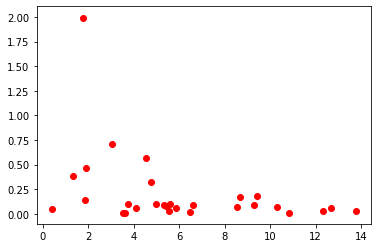

In [217]:
plt.scatter(X_train['tmean_m3'], y_train, color="red")
#plt.plot(X_train['tmean_m3'], regressor.predict(X_test), color = "blue")
#plt.title("Butterfly to Dragonfly Ratio")

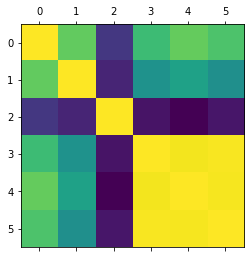

In [218]:
plt.matshow(X.corr())

In [219]:
output = open('regressor_Sep26.pk1','wb')
pickle.dump(regressor,output)
output.close()

In [139]:
get_dragon_butter_ratio_i_j(observation_data,0,13)

0.0546875

In [64]:
test = get_dragon_butter_ratio_i_j(observation_data,4,2)
test

0.03205128205128205

In [189]:
makedataframe = pd.DataFrame(get_features_monthJ(climate_data,observation_data,13))

In [190]:
makedataframe.head()

,depend_var,ppt_m1,ppt_m2,ppt_m3,tmean_m1,tmean_m2,tmean_m3
0,0.054688,142.070999,209.429993,145.201004,1.614,4.203,5.884
1,0.137112,81.075996,69.330002,67.829002,-4.552,-2.675,1.871
2,0.101449,98.137001,103.193001,107.989998,-1.988,1.177,3.748
3,0.011658,96.310997,62.758999,153.529999,-2.297,0.065,3.616
4,0.044444,81.427002,57.354000,60.671001,-5.846,-3.557,0.411


In [98]:
observation_data[0]['data']['dragonfly'].loc[1]['monthly_count']

24

In [97]:
climate_data[0]['ppts'][3]

188.68699645996102

In [21]:
len(climate_data[4]['ppts'])

17

In [22]:
len(observation_data[4]['data']['dragonfly'])

14

In [71]:
climate_data[4]['ppts'][16]

50.779998779296896

In [49]:
observation_data[4]['data']['dragonfly'].loc[13]['monthly_count']

40

In [50]:
observation_data[4]['data']['butterfly'].loc[13]['monthly_count']

899

In [32]:
climate_data[30]['ppts'][15]

152.539001464844

In [33]:
climate_data[30]['ppts'][15]

152.539001464844

In [51]:
observation_data[30]['data']['butterfly'].loc[13]['monthly_count']

1410

In [52]:
observation_data[30]['data']['dragonfly'].loc[13]['monthly_count']

17

In [116]:
climate_data[1]['ppts']

[43.5439987182617,
 51.1920013427734,
 122.403999328613,
 225.55299377441398,
 72.65699768066409,
 93.4720001220703,
 73.45899963378909,
 159.65499877929702,
 64.9530029296875,
 53.1520004272461,
 81.0759963989258,
 69.3300018310547,
 67.82900238037111,
 141.003997802734,
 257.743011474609,
 86.9209976196289,
 127.643997192383]

In [53]:
observation_data[1]['data']['butterfly'].loc[13]['monthly_count']

1640

In [54]:
observation_data[1]['data']['dragonfly'].loc[13]['monthly_count']

225

In [48]:
observation_data[4]['data']['butterfly']

,ds,monthly_count
0,2018-07-31,577
1,2018-08-31,430
2,2018-09-30,155
3,2018-10-31,30
4,2018-11-30,4
5,2018-12-31,1
6,2019-01-31,1
7,2019-02-28,1
8,2019-03-31,3
9,2019-04-30,32


In [42]:
observation_data[4]['data']['dragonfly']

,ds,monthly_count
0,2018-07-31,62
1,2018-08-31,17
2,2018-09-30,5
3,2018-10-31,4
4,2018-11-30,0
5,2018-12-31,0
6,2019-01-31,0
7,2019-02-28,0
8,2019-03-31,0
9,2019-04-30,1


In [72]:
len(observation_data)

38

In [83]:
climate_data

[{'ppts': [116.49500274658199,
   170.445007324219,
   126.96499633789101,
   188.68699645996102,
   31.7819995880127,
   65.0080032348633,
   185.149002075195,
   49.5919990539551,
   146.949996948242,
   136.63000488281202,
   142.070999145508,
   209.429992675781,
   145.20100402832,
   149.287994384766,
   175.725006103516,
   181.679000854492,
   126.203002929688],
  'tmeans': [7.101000308990481,
   10.266000747680698,
   22.7990016937256,
   25.4600009918213,
   25.8860015869141,
   24.661001205444304,
   23.112001419067397,
   14.9970006942749,
   4.902000427246089,
   4.694000244140621,
   1.61400008201599,
   4.20300006866455,
   5.88400030136108,
   13.6180009841919,
   20.050001144409197,
   22.9700012207031,
   25.943000793457],
  'cluster_id': 1},
 {'ppts': [43.5439987182617,
   51.1920013427734,
   122.403999328613,
   225.55299377441398,
   72.65699768066409,
   93.4720001220703,
   73.45899963378909,
   159.65499877929702,
   64.9530029296875,
   53.1520004272461,
   81

In [86]:
len(observation_data)

38